In [1]:
import pypsa
import pandas as pd

In [2]:
import import_ipynb
# This line imports the MGA_functions notebook which contains 
# the MGA_solver function and other plotting functions
from MGA_functions import * 

importing Jupyter notebook from MGA_functions.ipynb


#### Create annuity function

In [3]:
def annuity(n,r):
    """Calculate the annuity factor for an asset with lifetime n years and
    discount rate of r, e.g. annuity(20,0.05)*20 = 1.6"""

    if r > 0:
        return r/(1. - 1./(1.+r)**n)
    else:
        return 1/n

## Definie network and load data 

In [4]:
# Create network
network = pypsa.Network()
hours_in_2018=pd.date_range('2017-06-01T00:00Z','2017-07-01T00:00Z',freq='H') #'2017-12-31T23:00Z'
network.set_snapshots(hours_in_2018)

network.add("Bus","electricity bus")

# load electricity demand data
df_elec = pd.read_csv('data/Total Load - Day Ahead _ Actual_DK_201701010000-201801010000.csv',sep=',',index_col=0) # in MWh
#df_elec.drop(df_elec.tail(1).index,inplace=True)
df_elec = df_elec[:network.snapshots.size]

# add load to the bus
network.add("Load","load", bus="electricity bus", p_set=df_elec['Actual Total Load [MW] - Denmark (DK)'].tolist())

#network.add("Carrier", "gas", co2_emissions=0.19) # in t_CO2/MWh_th
#network.add("Carrier", "onshorewind")
#network.add("Carrier", "solar")

# add onshore wind generator
df_onshorewind = pd.read_csv('data/onshore_wind_1979-2017.csv',sep=';',index_col=0)
CF_wind=df_onshorewind['ESP'][[hour.strftime("%Y-%m-%dT%H:%M:%SZ") for hour in network.snapshots]]
capital_cost_onshorewind=annuity(30,0.07)*910000*(1+0.033) # in €/MW
network.add("Generator",
            "onshorewind",
            bus="electricity bus",
            p_nom_extendable=True,
            #carrier="onshorewind",
            #p_nom_max=1000,
            capital_cost = capital_cost_onshorewind,
            marginal_cost = 0,
            p_max_pu = CF_wind)

# add solar PV generator
df_solar = pd.read_csv('data/pv_optimal.csv',sep=';',index_col=0)
CF_solar=df_solar['ESP'][[hour.strftime("%Y-%m-%dT%H:%M:%SZ") for hour in network.snapshots]]
capital_cost_solar=annuity(25,0.07)*425000*(1+0.03) # in €/MW
network.add("Generator",
            "solar",
            bus="electricity bus",
            p_nom_extendable=True,
            #carrier="solar",
            #p_nom_max=1000,
            capital_cost = capital_cost_solar,
            marginal_cost = 0,
            p_max_pu = CF_solar)

# add gas turbine generator
capital_cost_OCGT=annuity(25,0.07)*560000*(1+0.033) # in €/MW
fuel_cost=21.6 # in €/MWh_th
efficiency=0.39
marginal_cost_OCGT=fuel_cost/efficiency # in €/MWh_el
network.add("Generator",
            "OCGT",
            bus="electricity bus",
            p_nom_extendable=True,
            #carrier="gas",
            p_nom_max=4000,
            capital_cost = capital_cost_OCGT,
            marginal_cost = marginal_cost_OCGT
           )

#### Solve the network using the MGA method 

In [5]:
network = MGA_solver(network,0.1)

INFO:pypsa.pf:Slack bus for sub-network 0 is electricity bus
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `angles` formulation
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x2888
  Lower bound: 1025158115.34072
  Upper bound: 1025158115.34072
  Number of objectives: 1
  Number of constraints: 5769
  Number of variables: 2888
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 2888
  Number of nonzeros: 9103
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model

INFO:pypsa.pf:Slack bus for sub-network 0 is electricity bus
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `angles` formulation
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x2888
  Lower bound: 2731852.1870235247
  Upper bound: 2731852.1870235247
  Number of objectives: 1
  Number of constraints: 5770
  Number of variables: 2888
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 2888
  Number of nonzeros: 9827
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: M

INFO:pypsa.pf:Slack bus for sub-network 0 is electricity bus
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `angles` formulation
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x2888
  Lower bound: 2091000.515739631
  Upper bound: 2091000.515739631
  Number of objectives: 1
  Number of constraints: 5770
  Number of variables: 2888
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 2888
  Number of nonzeros: 9827
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Mod

INFO:pypsa.pf:Slack bus for sub-network 0 is electricity bus
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `angles` formulation
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x2888
  Lower bound: 2230602.327020136
  Upper bound: 2230602.327020136
  Number of objectives: 1
  Number of constraints: 5770
  Number of variables: 2888
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 2888
  Number of nonzeros: 9827
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Mod

INFO:pypsa.pf:Slack bus for sub-network 0 is electricity bus
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `angles` formulation
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x2888
  Lower bound: 2102749.502986235
  Upper bound: 2102749.502986235
  Number of objectives: 1
  Number of constraints: 5770
  Number of variables: 2888
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 2888
  Number of nonzeros: 9827
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Mod

INFO:pypsa.pf:Slack bus for sub-network 0 is electricity bus
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `angles` formulation
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x2888
  Lower bound: 2231888.7538813557
  Upper bound: 2231888.7538813557
  Number of objectives: 1
  Number of constraints: 5770
  Number of variables: 2888
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 2888
  Number of nonzeros: 9827
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: M

INFO:pypsa.pf:Slack bus for sub-network 0 is electricity bus
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `angles` formulation
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x2888
  Lower bound: 2102503.812219148
  Upper bound: 2102503.812219148
  Number of objectives: 1
  Number of constraints: 5770
  Number of variables: 2888
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 2888
  Number of nonzeros: 9827
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Mod

INFO:pypsa.pf:Slack bus for sub-network 0 is electricity bus
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `angles` formulation
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x2888
  Lower bound: 2231888.7538813557
  Upper bound: 2231888.7538813557
  Number of objectives: 1
  Number of constraints: 5770
  Number of variables: 2888
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 2888
  Number of nonzeros: 9827
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: M

In [6]:
network_cost = [] # Total cost for one year of opperation
for solution in network.solutions:
    labels = solution.generators.index.tolist()
    productions = [] # Production in MWh per technology
    for generator in solution.generators.index.tolist():
        productions.append(solution.generators_t.p[generator].sum())

    sizes=solution.generators['p_nom_opt'] # Plant sizes in MW

    generator_cost = solution.generators['capital_cost']*sizes+productions*solution.generators['marginal_cost']


    network_cost.append( int(sum(generator_cost)/1000000))

network_cost
 

[1025, 1127, 1127, 1127, 1127, 1127, 1127]

Solution cost 1025
Solution cost 1127
Solution cost 1127
Solution cost 1127
Solution cost 1127
Solution cost 1127
Solution cost 1127


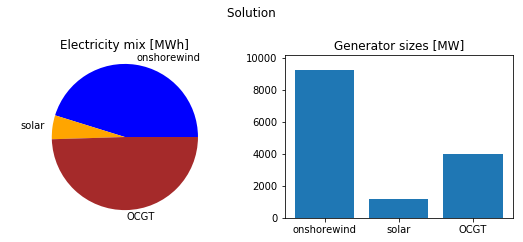

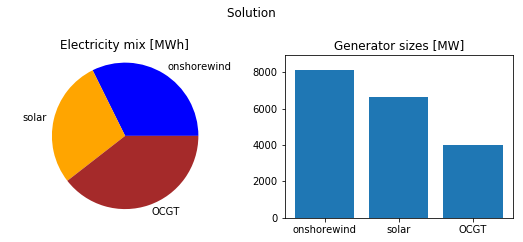

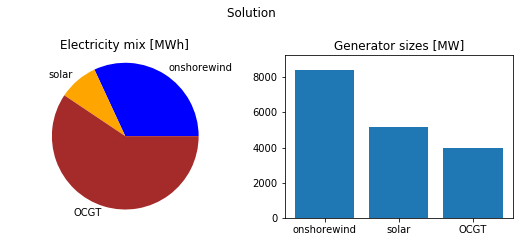

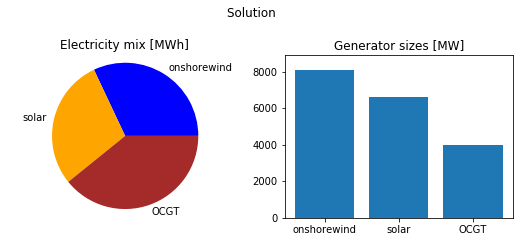

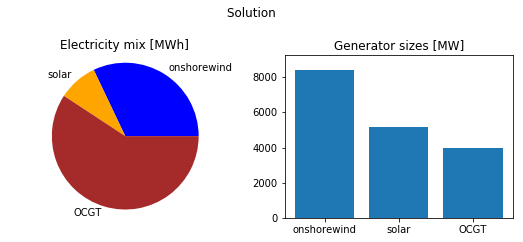

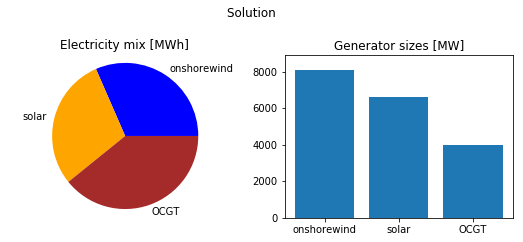

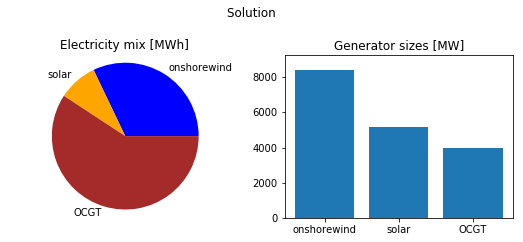

In [7]:
i = 0
for solution in network.solutions:
    print('Solution cost ' + str(network_cost[i]))
    plot_generator_mix(solution) 
    #plot_timeseries(solution)
    i += 1